In [37]:
import pandas as pd
import numpy as np
import seaborn as sn
from datetime import datetime
%matplotlib inline

# Identifying Useful Features

In [104]:
df_users = pd.read_csv('C:\\Users\\jltsa\\Desktop\\DataScience\\relax_challenge\\takehome_users.csv', encoding='latin-1')

In [48]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [49]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [50]:
df_user_eng = pd.read_csv('C:\\Users\\jltsa\\Desktop\\DataScience\\relax_challenge\\takehome_user_engagement.csv', encoding='latin-1')

In [51]:
df_user_eng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [52]:
df_user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


## Find 'Adopted Users'

An  "adopted  user"   is  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven-day  period.  Whether users are 'adopted users or not will be our prediction label.

In [53]:
#group by user id to get count of logins
#find users with at least 3 logins
df_login_ct = df_user_eng.groupby('user_id').count()
df_login_ct.head()

,time_stamp,visited
user_id,,
1,1,1
2,14,14
3,1,1
4,1,1
5,1,1


In [54]:
#list of user ids with 3 or more logins
user_id_3 = list(df_login_ct[df_login_ct.visited >= 3].index)
print('There are ' + str(len(user_id_3)) +' users who have logged in more than 3 times.')

There are 2248 users who have logged in more than 3 times.


In [55]:
#Dataframe with all users with 3 or more logins
df_user_eng_3 = df_user_eng[df_user_eng['user_id'].isin(user_id_3)]

In [56]:
df_user_eng_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
time_stamp    201002 non-null object
user_id       201002 non-null int64
visited       201002 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [57]:
df_user_eng_3.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [60]:
def convert_to_dt(row):
    date_format = '%Y-%m-%d'
    val = datetime.strptime(row['time_stamp'][:10], date_format)
    return val

In [61]:
#convert time_stamp column into datetime objects
df_user_eng_3['time_stamp'] = df_user_eng_3.apply(convert_to_dt, axis=1)

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
df_user_eng_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201002 entries, 1 to 207909
Data columns (total 3 columns):
time_stamp    201002 non-null datetime64[ns]
user_id       201002 non-null int64
visited       201002 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.1 MB


In [74]:
df_user_eng_3

,time_stamp,user_id,visited
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1
5,2013-12-31,2,1
6,2014-01-08,2,1
7,2014-02-03,2,1
8,2014-02-08,2,1
9,2014-02-09,2,1
10,2014-02-13,2,1


In [77]:
#Find rolling logins over 7 days
def get_rolling_amount(grp, freq):
    return grp.rolling(freq, on='time_stamp')['visited'].sum()

df_user_eng_3['rolling_logins_7days'] = df_user_eng_3.groupby('user_id', as_index=False, group_keys=False) \
                            .apply(get_rolling_amount, '7D')

C:\Users\jltsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [79]:
df_user_eng_3.head(15)

,time_stamp,user_id,visited,rolling_logins_7days
1,2013-11-15,2,1,1.0
2,2013-11-29,2,1,1.0
3,2013-12-09,2,1,1.0
4,2013-12-25,2,1,1.0
5,2013-12-31,2,1,2.0
6,2014-01-08,2,1,1.0
7,2014-02-03,2,1,1.0
8,2014-02-08,2,1,2.0
9,2014-02-09,2,1,3.0
10,2014-02-13,2,1,3.0


In [80]:
#get DataFrame with users with have logged in 3 more times times within a 7 day rolling period
df_rolling_3 = df_user_eng_3[df_user_eng_3['rolling_logins_7days'] >=3]

In [85]:
#list of ids for 'adopted users'
adopted_user_ids = list(df_rolling_3.user_id.unique())

### Add a feature 'was invited'

In [105]:
def was_invited(row):
    #returns 1 if a user was invited by another user
    #returns 0 otherwise
    if pd.isnull(row['invited_by_user_id']) == False:
        return 1
    else:
        return 0

In [106]:
df_users['was_invited'] = df_users.apply(was_invited, axis=1)

## Add 'adopted user' feature to user info table

In [107]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,was_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1


In [108]:
def is_adopted_user(row):
    #returns 1 if the user is an 'adopted user'
    #returns 0 if otherwise
    if row['object_id'] in adopted_user_ids:
        return 1
    else:
        return 0 

In [109]:
df_users['adopted_user'] = df_users.apply(is_adopted_user, axis=1)

In [110]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,was_invited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1,0


In [111]:
df_users[df_users['was_invited']==0].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,was_invited,adopted_user
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0,0
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,1.388117e+09,0,0,69,NaN,0,0
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,1.350058e+09,0,0,0,NaN,0,0


## Keep only features to use for predictions

In [113]:
df_users.drop(['object_id', 'creation_time', 'name', 'email',
               'last_session_creation_time', 'last_session_creation_time',
               'invited_by_user_id'], inplace=True, axis=1)

In [114]:
df_users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,was_invited,adopted_user
0,GUEST_INVITE,1,0,11,1,0
1,ORG_INVITE,0,0,1,1,1
2,ORG_INVITE,0,0,94,1,0
3,GUEST_INVITE,0,0,1,1,0
4,GUEST_INVITE,0,0,193,1,0


### Create dummy variables for categorical column

In [120]:
df_users = pd.get_dummies(df_users, columns=['creation_source'])

In [121]:
df_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,was_invited,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,1,0,1,0,0,0,0
1,0,0,1,1,1,0,1,0,0,0
2,0,0,94,1,0,0,1,0,0,0
3,0,0,1,1,0,1,0,0,0,0
4,0,0,193,1,0,1,0,0,0,0


## Determine Feature Importance

In [123]:
#Get labels
pred_labels = df_users['adopted_user'].values

In [124]:
df_users.drop('adopted_user', inplace=True, axis=1)

### Univariate Selection

Use chi-squared statistical test for non-negative features.

In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [148]:
#features
x = df_users
#label
y = pred_labels

In [133]:
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(x,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x.columns)

featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features','Chi-squared Score']
print(featureScores.nlargest(9,'Chi-squared Score'))
#High chi-square represents there is a higher likelihood that a feature is correlated
#with a class and should be used during model selection

                             Features  Chi-squared Score
2                              org_id        5418.462606
6   creation_source_PERSONAL_PROJECTS          56.844560
4        creation_source_GUEST_INVITE          20.283149
8  creation_source_SIGNUP_GOOGLE_AUTH          13.848040
3                         was_invited           4.274697
7              creation_source_SIGNUP           0.857191
0            opted_in_to_mailing_list           0.590515
5          creation_source_ORG_INVITE           0.451700
1          enabled_for_marketing_drip           0.220970


### Feature Importance

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [168]:
#Split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [171]:
#Instantiate Random Forest Classifier with default hyper parameters
#We will use this model to demonstrate feature importance
model = RandomForestClassifier()
model.fit(X_train, y_train)

C:\Users\jltsa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [172]:
#Accuracy score of model
model.score(X_test, y_test)

0.81875

In [173]:
#Classification report
predict_model = model.predict(X_test)
print(classification_report(y_test, predict_model))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2074
           1       0.18      0.09      0.12       326

   micro avg       0.82      0.82      0.82      2400
   macro avg       0.52      0.51      0.51      2400
weighted avg       0.77      0.82      0.79      2400



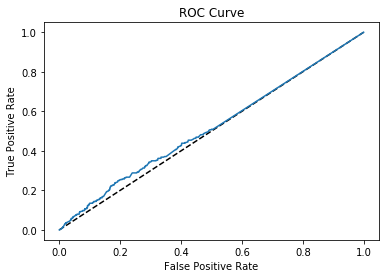

In [174]:
#AUC
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [175]:
#AUC score
auc(fpr, tpr)

0.5151266631564624

FYI The model is not that great.  Tune hyper parameters and add better features to improve results. This example is just showing how to extract feature importance.

[0.01103203 0.01168872 0.95355901 0.00262424 0.00372073 0.00126269
 0.00898366 0.00262394 0.00450499]


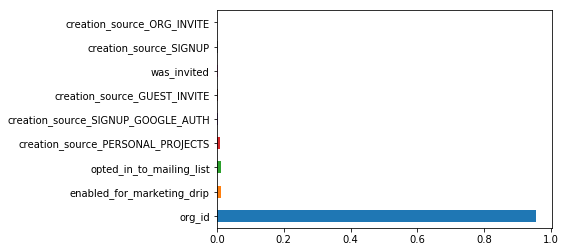

In [176]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

## Correlation and Heat Map

In [177]:
corr_mat = x.corr()

In [178]:
corr_mat

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,was_invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,1.000000,0.483529,0.003432,0.006934,0.000667,0.006694,-0.007432,0.002181,-0.004555
enabled_for_marketing_drip,0.483529,1.000000,0.009275,0.002216,-0.002438,0.004270,-0.007518,0.004528,0.000127
org_id,0.003432,0.009275,1.000000,-0.018442,-0.002045,-0.017586,0.008974,0.016140,-0.001052
was_invited,0.006934,0.002216,-0.018442,1.000000,0.437386,0.691238,-0.495336,-0.491916,-0.387255
creation_source_GUEST_INVITE,0.000667,-0.002438,-0.002045,0.437386,1.000000,-0.347502,-0.216653,-0.215157,-0.169380
creation_source_ORG_INVITE,0.006694,0.004270,-0.017586,0.691238,-0.347502,1.000000,-0.342395,-0.340031,-0.267686
creation_source_PERSONAL_PROJECTS,-0.007432,-0.007518,0.008974,-0.495336,-0.216653,-0.342395,1.000000,-0.211995,-0.166891
creation_source_SIGNUP,0.002181,0.004528,0.016140,-0.491916,-0.215157,-0.340031,-0.211995,1.000000,-0.165739
creation_source_SIGNUP_GOOGLE_AUTH,-0.004555,0.000127,-0.001052,-0.387255,-0.169380,-0.267686,-0.166891,-0.165739,1.000000


In [180]:
top_corr_features = corr_mat.index
top_corr_features

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'was_invited', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')

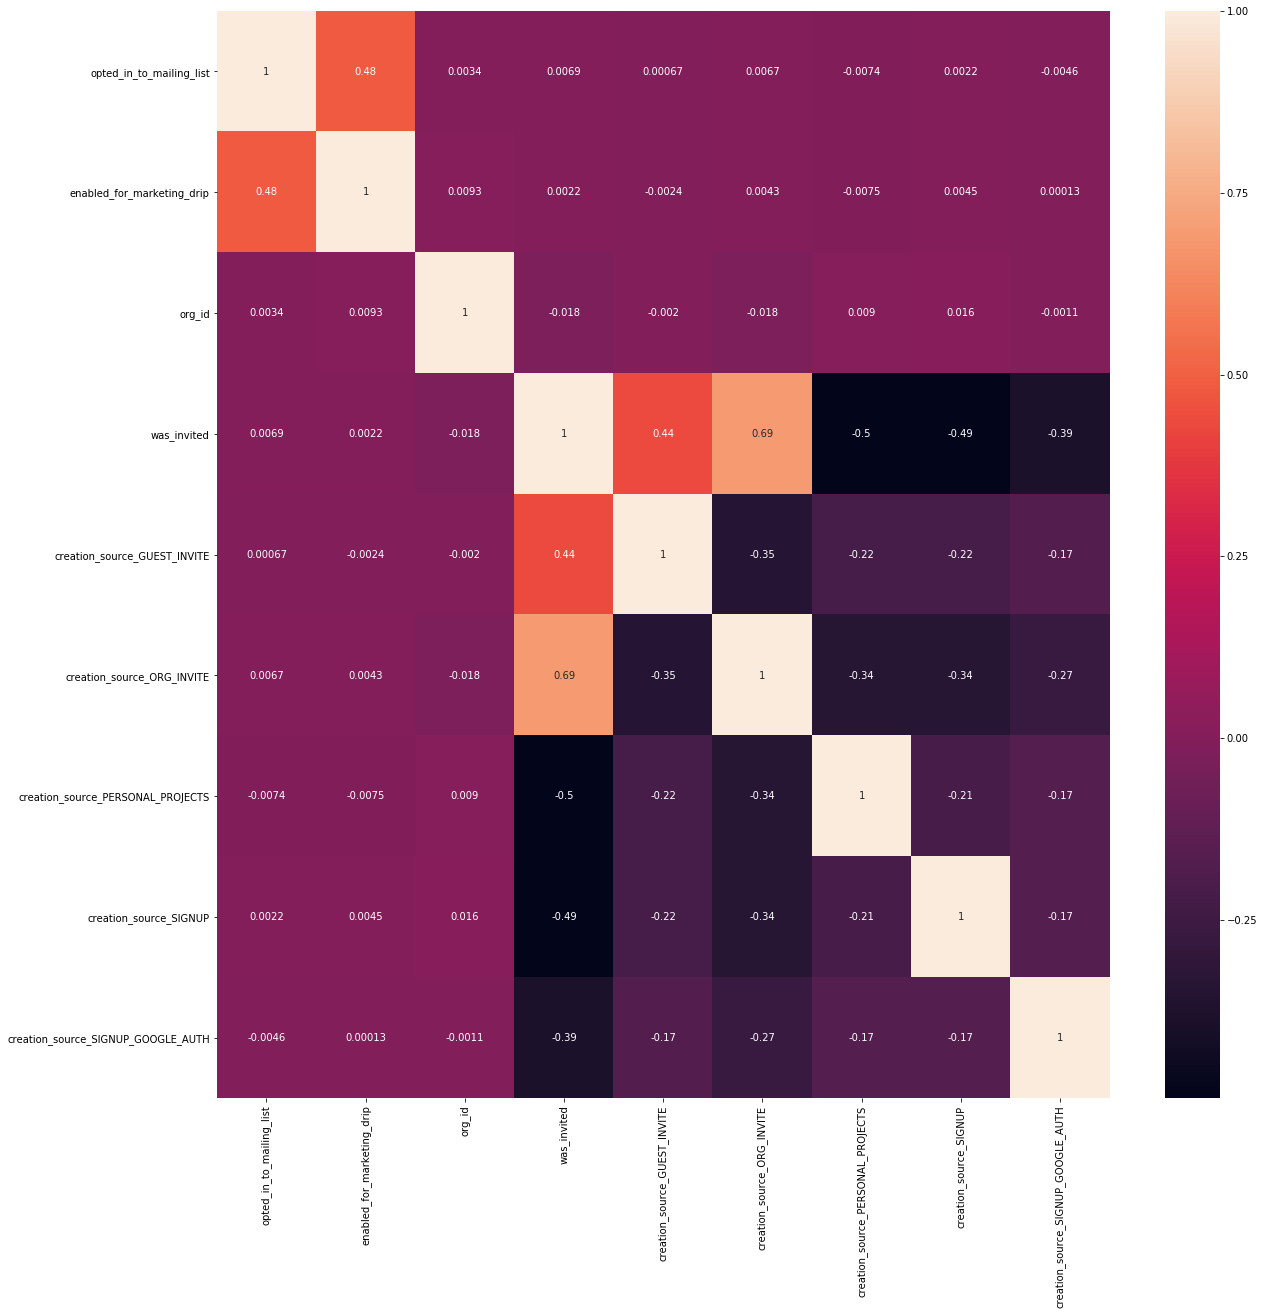

In [185]:
plt.figure(figsize=(20,20))
#plot heat map
g = sn.heatmap(x[top_corr_features].corr(),annot=True)

# Main Takeaway

From our analysis we can tell that the organization id has strong effect on predicting future user adoption.  This makes sense because an organization may have it's employees use this product.  Having signed up to build a personal project, and being opted in to marketing aslo effect user adoption.

## Next Steps

Engineer more features that might give better perdictions.  For instance maybe add a feature that give some information bout the user that invite the current user.  Maybe certain users have more influence on getting people to adopt this product.